# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_il_other, get_and_process_covidtracking_data_il_contact, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))
df_other = get_and_process_covidtracking_data_il_other(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))
df_contact = get_and_process_covidtracking_data_il_contact(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))


In [3]:
region = "Israel"
model_data = df.loc[region]
model_data_other = df_other.loc[region]
model_data_contact = df_contact.loc[region]

## Create the model instance and sample

In [4]:
gm = GenerativeModel(region, model_data)
gm.sample()
gm_other = GenerativeModel(region, model_data_other)
gm_other.sample()
gm_contact = GenerativeModel(region, model_data_contact)
gm_contact.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2796 seconds.
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2705 seconds.
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 2636 seconds.


## Summarize Model Output

In [5]:
result = summarize_inference_data(gm.inference_data)
result_other = summarize_inference_data(gm_other.inference_data)
result_contact = summarize_inference_data(gm_contact.inference_data)

In [6]:
result.tail(21)

result_contact.tail(21)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-07-06,1.017748,1.016179,0.919371,1.128043,279.731679,304.258002,293.998245,609.0,689
2020-07-07,1.017156,1.016890,0.909899,1.131005,280.732584,306.051133,297.096318,552.0,618
2020-07-08,1.015790,1.010170,0.900513,1.125345,281.704017,307.785096,298.526379,683.0,761
2020-07-09,1.015612,1.010337,0.884152,1.122085,282.662319,309.468437,301.892929,619.0,682
2020-07-10,1.015219,1.005379,0.890083,1.138625,283.611548,311.102321,289.025947,484.0,557
2020-07-11,1.015724,1.004866,0.881200,1.139639,284.572131,312.688079,296.291746,261.0,293
2020-07-12,1.017553,1.005578,0.864030,1.143721,285.580121,314.226868,306.600983,601.0,652
2020-07-13,1.017655,1.012870,0.869753,1.165519,286.675710,315.718266,307.684768,617.0,667
2020-07-14,1.018365,1.011529,0.846934,1.150023,287.926951,317.162131,314.041595,710.0,752


## Plot Model Output

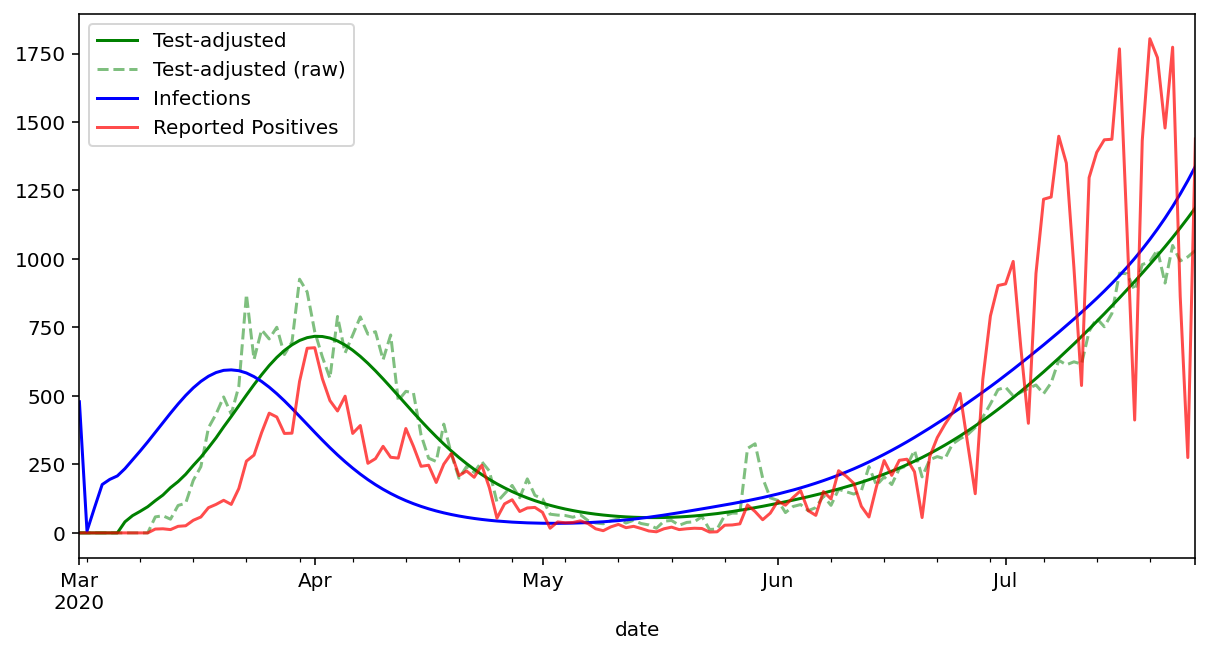

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

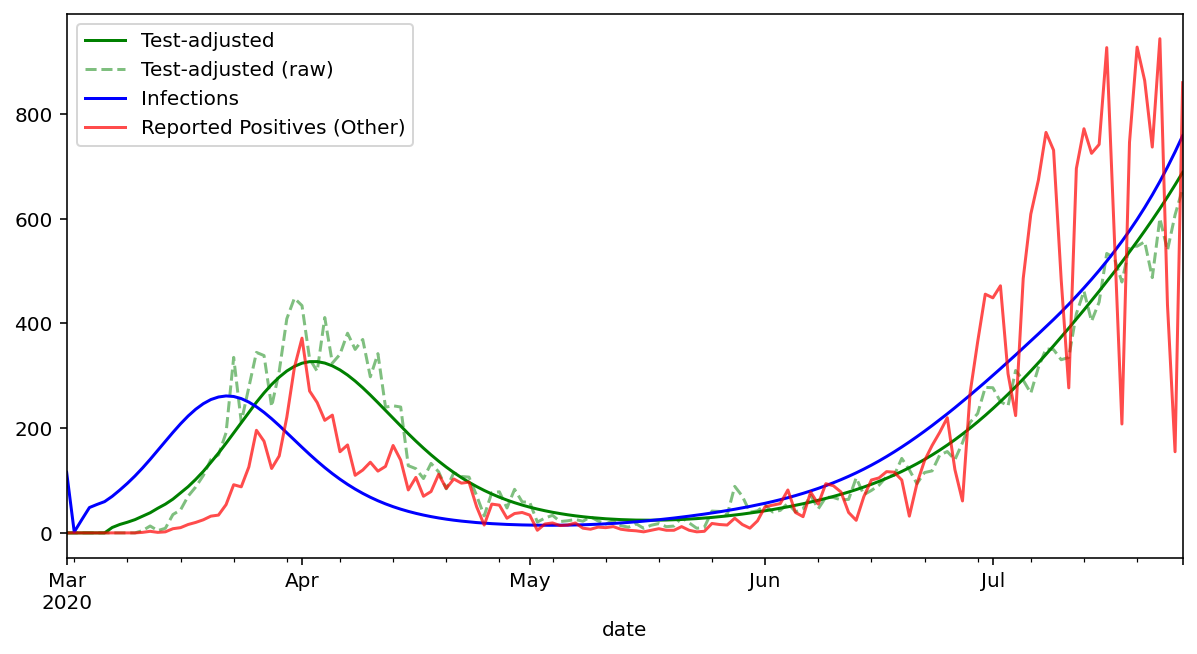

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
result_other.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result_other.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result_other.infections.plot(c="b", label="Infections")
gm_other.observed.positive.plot(c='r', alpha=.7, label="Reported Positives (Other)")
fig.set_facecolor('w')
ax.legend();

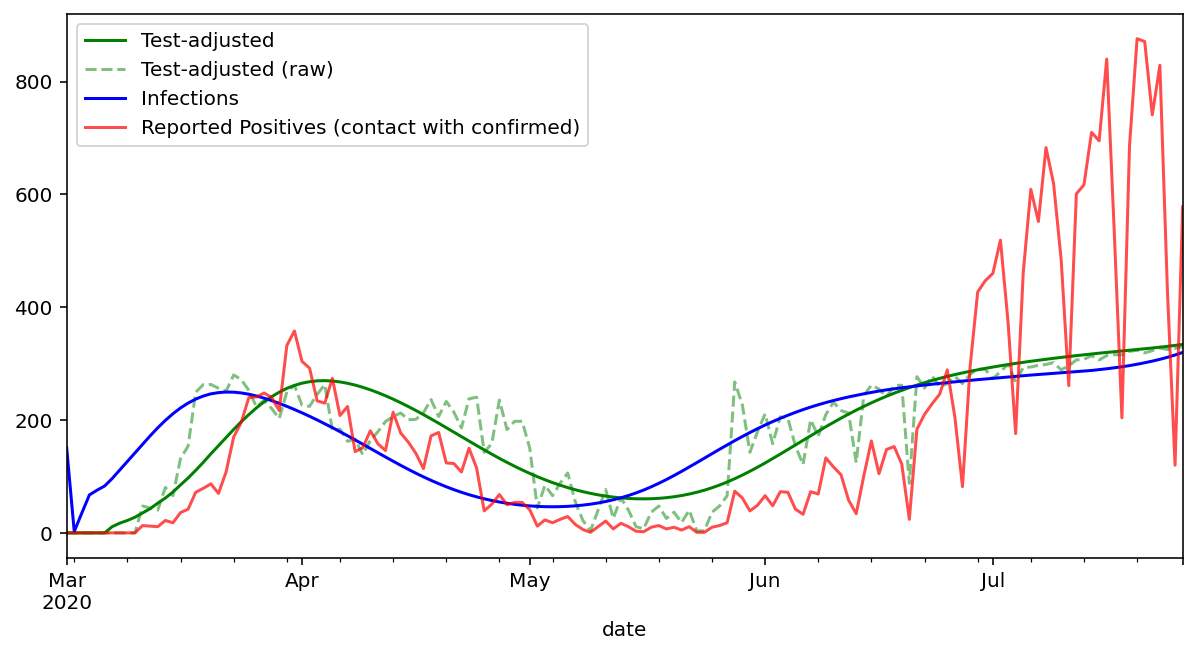

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
result_contact.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result_contact.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result_contact.infections.plot(c="b", label="Infections")
gm_contact.observed.positive.plot(c='r', alpha=.7, label="Reported Positives (contact with confirmed)")
fig.set_facecolor('w')
ax.legend();

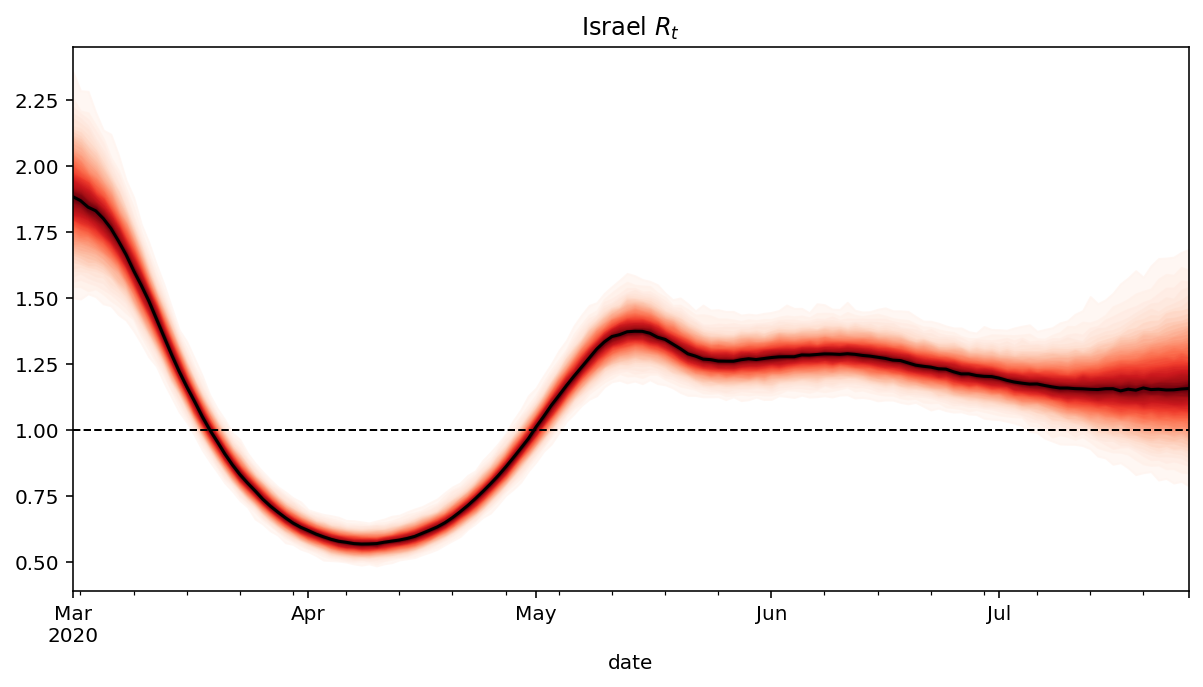

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

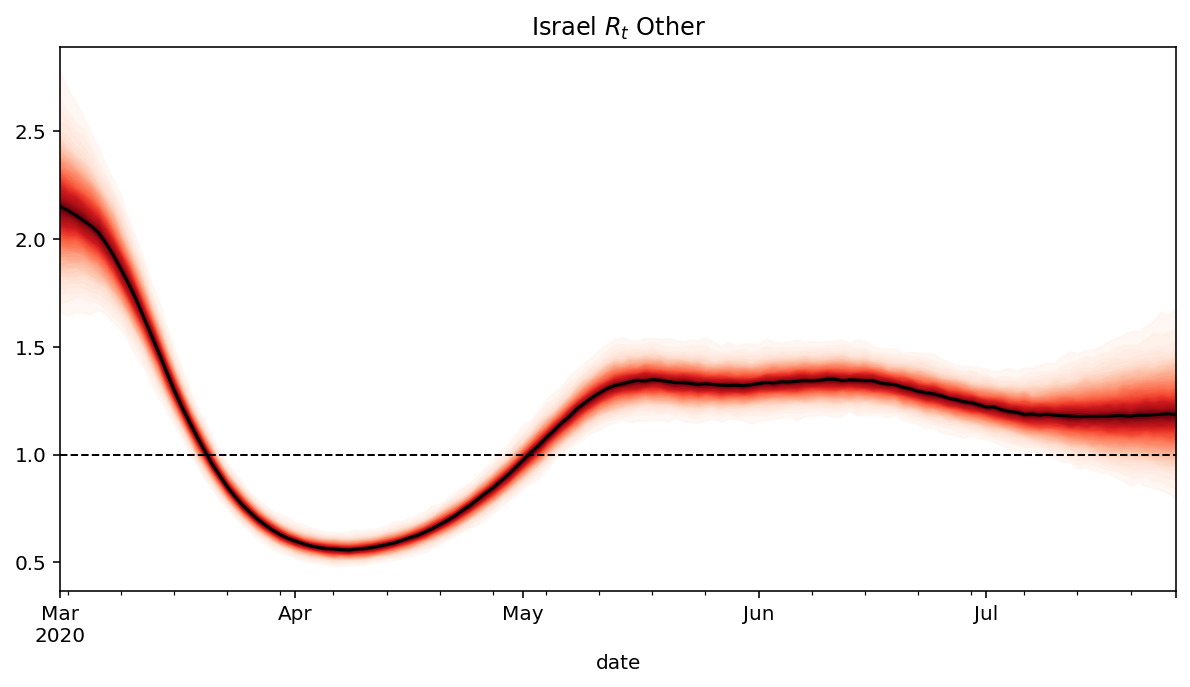

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ Other")
samples = gm_other.trace['r_t']
x=result_other.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result_other["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

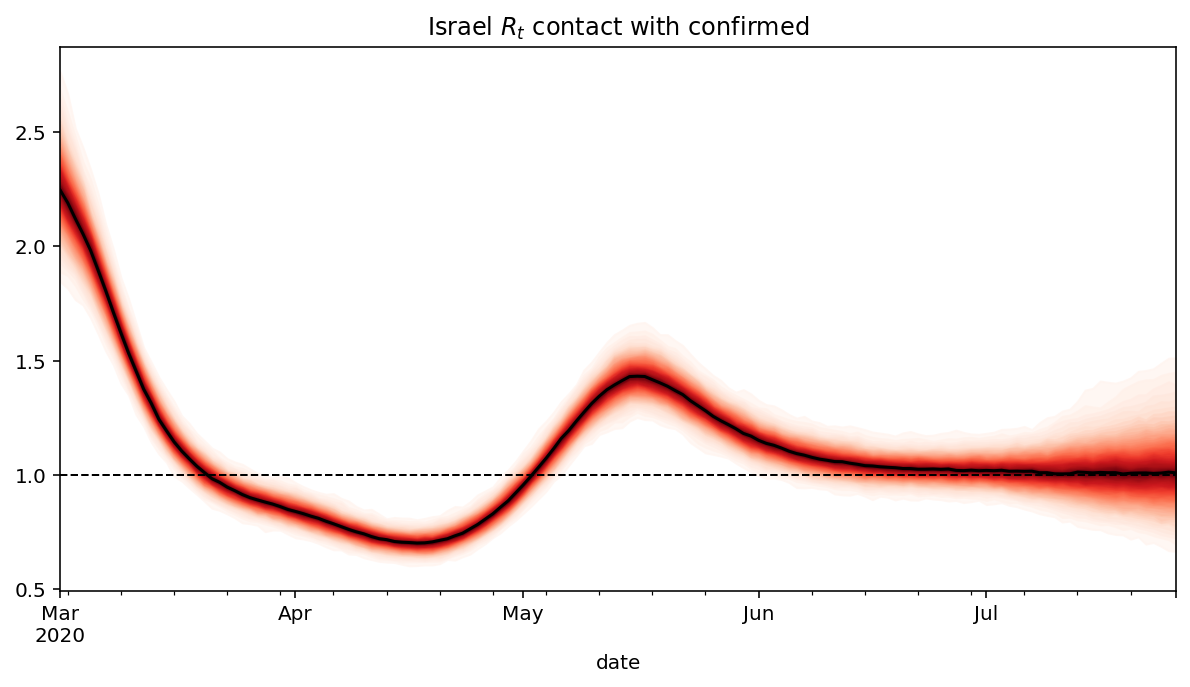

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ contact with confirmed")
samples = gm_contact.trace['r_t']
x=result_contact.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result_contact["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

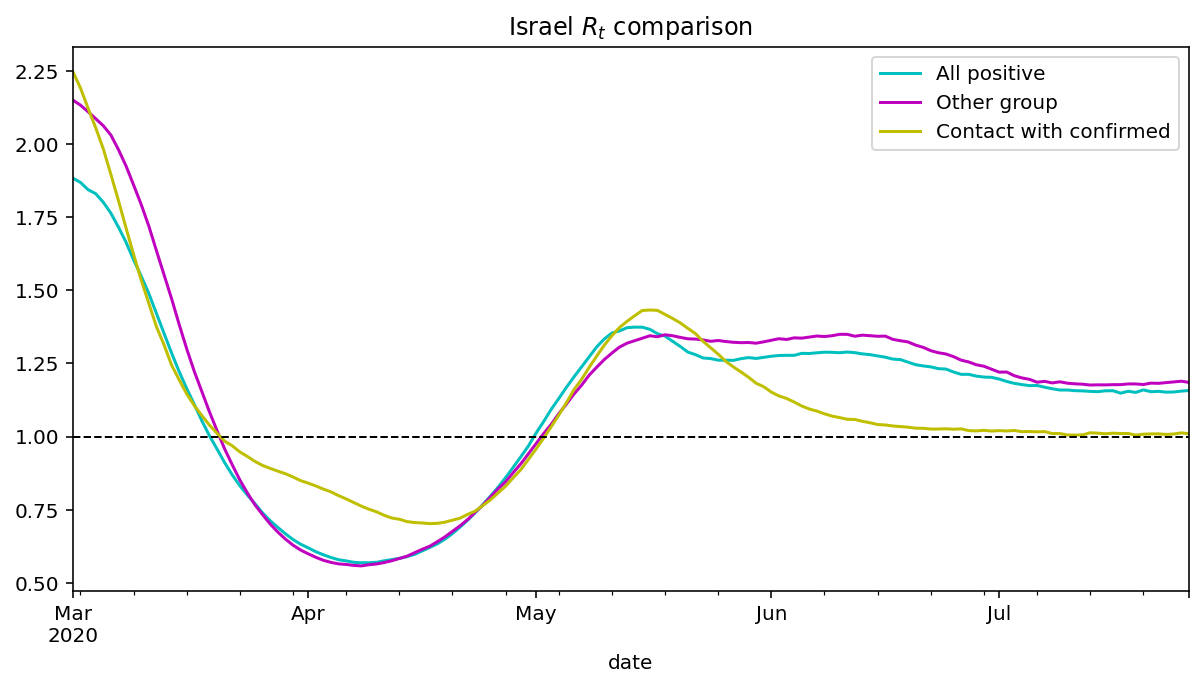

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ comparison")
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))

result["median"].plot(c="c", ls='-', label="All positive")
result_other["median"].plot(c="m", ls='-', label="Other group")
result_contact["median"].plot(c="y", ls='-', label="Contact with confirmed")

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')
ax.legend()

In [14]:
result_other.tail(21)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-07-06,1.192510,1.185723,1.087947,1.297824,366.645472,309.337393,266.965495,609.0,22169
2020-07-07,1.189519,1.188603,1.062505,1.272282,380.151909,324.991183,316.106284,674.0,20721
2020-07-08,1.188053,1.183221,1.045031,1.273681,393.807815,341.016477,351.607579,765.0,21144
2020-07-09,1.188275,1.187091,1.061897,1.307638,407.702141,357.389350,350.052887,731.0,20294
2020-07-10,1.186968,1.182217,1.059431,1.314532,421.979002,374.086175,330.772738,484.0,14220
2020-07-11,1.185965,1.180139,1.055305,1.322178,436.780314,391.086311,335.192341,277.0,8031
2020-07-12,1.183325,1.178877,1.022105,1.305239,452.121021,408.366835,418.632034,696.0,16157
2020-07-13,1.183203,1.176013,1.036027,1.330383,467.977883,425.905905,461.914651,772.0,16242
2020-07-14,1.184079,1.176660,1.042362,1.360368,484.330024,443.688498,404.319084,725.0,17426
